In [1]:
from os.path import join
from os import listdir, makedirs
import pandas as pd
from json import load
from stepmix import StepMix
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sys import path
path.insert(0, '..')
from utils import format_decision_tree_plot

In [2]:
onet_skills = pd.read_csv(join('..', 'onet_skills_unstacked.csv'), index_col=['O*NET-SOC Code', 'Title'])

In [3]:
SAVE_FIGURES = True
PRINT_OUTPUT = True
SEED = 42
GROUP_SKILL_MAPPING_PATH = 'option3.json'
OUTPUT_PATH = 'outputs_option3'

In [4]:
try:
    listdir(OUTPUT_PATH)
except FileNotFoundError:
    makedirs(OUTPUT_PATH)

In [5]:
with open(GROUP_SKILL_MAPPING_PATH) as file:
    group_skill_mapping = load(file)

In [6]:
for group, skills in group_skill_mapping.items():
    onet_skills[group] = onet_skills[skills].astype('float').mean(axis=1)

onet_skills = onet_skills[group_skill_mapping.keys()]

# Finding Ideal Number of Components In Mixture Model

In [7]:
aic = []
bic = []
range_components_trying = range(2, 20)
for i in range_components_trying:
    gmm = StepMix(
        n_components = i,
        measurement = 'continuous',
        init_params = 'random',
        random_state = SEED,
        progress_bar = 1 if PRINT_OUTPUT else 0
    ).fit(
        X=onet_skills.values
    )
    aic.append(gmm.aic(onet_skills.values))
    bic.append(gmm.bic(onet_skills.values))

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 144.19it/s, max_LL=-1.07e+4, max_avg_LL=-12.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 96.71it/s, max_LL=-8.91e+3, max_avg_LL=-10.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 54.06it/s, max_LL=-7.93e+3, max_avg_LL=-9.08]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 35.15it/s, max_LL=-7.27e+3, max_avg_LL=-8.33]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 51.01it/s, max_LL=-6.89e+3, max_avg_LL=-7.89]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 66.64it/s, max_LL=-6.43e+3, max_avg_LL=-7.37]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 26.34it/s, max_LL=-6.1e+3, max_avg_LL=-6.99]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.98it/s, max_LL=-5.9e+3, max_avg_LL=-6.76]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 43.55it/s, max_LL=-5.75e+3, max_avg_LL=-6.59]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 28.90it/s, max_LL=-5.45e+3, max_avg_LL=-6.25]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.31it/s, max_LL=-5.22e+3, max_avg_LL=-5.98]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 28.66it/s, max_LL=-5.2e+3, max_avg_LL=-5.96]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 23.41it/s, max_LL=-5.02e+3, max_avg_LL=-5.75]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 13.59it/s, max_LL=-4.96e+3, max_avg_LL=-5.68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 28.76it/s, max_LL=-4.68e+3, max_avg_LL=-5.36]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.64it/s, max_LL=-4.45e+3, max_avg_LL=-5.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 23.58it/s, max_LL=-4.57e+3, max_avg_LL=-5.24]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.51it/s, max_LL=-4.52e+3, max_avg_LL=-5.18]


/var/folders/nc/4202mlvd4hg61x79bmx7rfg00000gn/T/ipykernel_7010/465750531.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


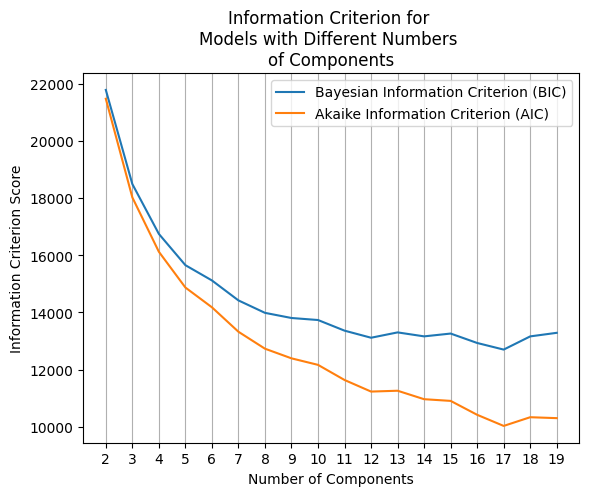

In [8]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xticks(ticks = range(len(range_components_trying)), labels = range_components_trying)
axes.grid(visible=True, axis='x')
axes.set_ylabel('Information Criterion Score')
axes.set_xlabel('Number of Components')
axes.set_title('Information Criterion for \nModels with Different Numbers \nof Components')

axes.plot(bic)
axes.plot(aic)
axes.legend(['Bayesian Information Criterion (BIC)', 'Akaike Information Criterion (AIC)'])

if SAVE_FIGURES:
    figure.savefig(join(OUTPUT_PATH, 'latent_profile_analysis.png'))
if PRINT_OUTPUT:
    figure.show()
else:
    plt.close(figure)

The graphs seem to indicate that a model with <i>4-6 components</i> would be both relatively well-performing and still parsimonious.

In [27]:
NUM_CLUSTERS = 5 # <-- Choose here.

# Fitting and Assessing Models

In [28]:
model = StepMix(
    n_components = NUM_CLUSTERS,
    measurement = 'continuous',
    init_params = 'random',
    random_state = SEED,
    progress_bar = 1 if PRINT_OUTPUT else 0
).fit(
    X=onet_skills.values
)

assignments = model.predict(onet_skills.values)
assignments_probabilities = np.apply_along_axis(
    max, 
    arr=model.predict_proba(onet_skills.values), 
    axis=1
)
onet_skills['Cluster'] = assignments
onet_skills['Cluster Probability'] = assignments_probabilities

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 29.89it/s, max_LL=-2.33e+3, max_avg_LL=-2.67]


## Displaying Cluster Assignments and Describing Clusters

In [29]:
if SAVE_FIGURES:
    excel_writer = pd.ExcelWriter(join(OUTPUT_PATH, f'latent_profile_analysis_{NUM_CLUSTERS}_clusters.xlsx'))

Displaying Cluster Assignments

In [30]:
assignments = onet_skills.reset_index().set_index('Cluster')[['Title', 'O*NET-SOC Code']].sort_index()

if PRINT_OUTPUT:
    display(assignments)
if SAVE_FIGURES:
    assignments.to_excel(excel_writer, 'Cluster Assignments')

,Title,O*NET-SOC Code
Cluster,,
0,Electro-Mechanical and Mechatronics Technologi...,17-3024.00
0,Conservation Scientists,19-1031.00
0,Park Naturalists,19-1031.03
0,Bill and Account Collectors,43-3011.00
0,Real Estate Sales Agents,41-9022.00
...,...,...
4,"Insulation Workers, Mechanical",47-2132.00
4,"Insulation Workers, Floor, Ceiling, and Wall",47-2131.00
4,Glaziers,47-2121.00


Displaying Cluster Skill Means

In [31]:
occupation_clusters_groupby = onet_skills.drop(columns='Cluster Probability').groupby(
    by=['Cluster']
)

mean = occupation_clusters_groupby.mean()
median = occupation_clusters_groupby.median()
std = occupation_clusters_groupby.std()
if PRINT_OUTPUT:
    display(mean)
    display(median)
    display(std)
if SAVE_FIGURES:
    mean.to_excel(excel_writer, 'Cluster Means')
    median.to_excel(excel_writer, 'Cluster Medians')
    std.to_excel(excel_writer, 'Cluster Standard Deviations')

,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Process,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,3.202032,2.208810,3.089144,2.962406,1.202721,1.275419,3.839519,2.657380,3.923369,1.434706,3.748663,3.531551,3.302139,3.803422,2.950749,3.445668
1,2.917516,1.946925,2.706884,2.578323,1.967927,0.950000,3.231366,2.298012,3.253602,1.084348,3.113478,2.937329,2.979193,3.307143,2.677143,3.191553
2,4.057734,2.507129,3.414870,3.702734,0.815908,1.823802,4.352891,3.443594,4.888750,3.252578,4.421172,4.493672,4.311953,4.428672,3.840469,3.986562
3,3.798344,2.739363,3.420446,3.614098,1.030486,1.740658,4.039236,3.164968,4.230828,2.100382,4.027707,3.967452,3.858535,4.075159,3.424586,3.939363
4,2.400792,1.534646,2.226965,1.912069,1.782359,0.544458,2.787958,1.814292,2.642750,0.412333,2.613667,2.299458,2.225250,2.790458,1.975583,2.754333


,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Process,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,3.12,2.09500,3.061667,3.000000,0.982500,1.126667,3.88,2.75,4.00,1.12,3.75,3.50,3.25,3.88,3.00,3.50
1,3.00,1.93750,2.728333,2.503333,2.142500,0.916667,3.12,2.25,3.12,1.00,3.00,3.00,3.00,3.25,2.75,3.12
2,4.00,2.46875,3.364167,3.626667,0.609375,1.580000,4.25,3.25,4.88,3.75,4.38,4.50,4.25,4.38,3.88,4.00
3,3.88,2.62500,3.416667,3.586667,0.873750,1.586667,4.00,3.12,4.12,2.00,4.00,4.00,3.88,4.12,3.38,4.00
4,2.38,1.53250,2.226667,1.960000,1.922500,0.500000,2.88,1.88,2.75,0.25,2.62,2.25,2.12,2.88,2.00,2.88


,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Process,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,0.248990,0.517737,0.319103,0.296253,0.912501,0.643723,0.242836,0.687731,0.272329,1.222765,0.298269,0.420310,0.276284,0.186167,0.379736,0.339101
1,0.212806,0.363649,0.288695,0.280237,1.063080,0.402899,0.299811,0.558058,0.283625,0.837480,0.258603,0.213069,0.157512,0.233515,0.379527,0.263139
2,0.355964,0.606011,0.347071,0.376797,0.755934,0.840634,0.336703,0.991123,0.283202,1.383046,0.343533,0.370222,0.335864,0.333052,0.520100,0.311742
3,0.319994,0.605621,0.308540,0.292983,0.720360,0.679060,0.130966,0.628666,0.265013,1.301949,0.128880,0.177554,0.200438,0.142535,0.396610,0.325107
4,0.328215,0.313327,0.304768,0.356646,0.835783,0.337465,0.316723,0.601446,0.407751,0.489537,0.360196,0.423341,0.321245,0.311795,0.426396,0.325275


Displaying Cluster Representatives

In [32]:
top_k_highest_prob_occupations_each_cluster = onet_skills \
    .sort_values(
        by=['Cluster', 'Cluster Probability'],
        ascending=[True, False]
    ) \
    .groupby(
        by=['Cluster']
    ) \
    .nth[0:10] \
    .reset_index() \
    .set_index(['Cluster', 'O*NET-SOC Code', 'Title'])

if PRINT_OUTPUT:
    display(top_k_highest_prob_occupations_each_cluster)
if SAVE_FIGURES:
    top_k_highest_prob_occupations_each_cluster.to_excel(excel_writer, 'Cluster Representatives')

Complex Problem Solving Skills  \
Cluster O*NET-SOC Code Title                                                                                
0       11-3012.00     Administrative Services Managers                                              3.12   
        11-9179.02     Spa Managers                                                                  3.12   
        13-1021.00     Buyers and Purchasing Agents, Farm Products                                   3.00   
        13-1022.00     Wholesale and Retail Buyers, Except Farm Products                             3.12   
        13-1121.00     Meeting, Convention, and Event Planners                                       3.50   
        13-1131.00     Fundraisers                                                                   3.25   
        13-2011.00     Accountants and Auditors                                                      3.56   
        13-2082.00     Tax Preparers                                                                 3.00   
        15-1253.00     Software Quality Assurance Analysts and Testers                               3.12   
        15-1299.01     Web Administrators                                                            3.88   
1       35-2013.00     Cooks, Private Household                                                      2.88   
        35-3011.00     Bartenders                                                                    2.62   
        39-9011.00     Childcare Workers                                                             2.88   
        47-2011.00     Boilermakers                                                                  3.12   
        47-2231.00     Solar Photovoltaic Installers                                                 3.12   
        47-4021.00     Elevator and Escalator Installers and Repairers                               3.12   
        47-5012.00     Rotary Drill Operators, Oil and Gas                                           3.12   
        47-5013.00     Service Unit Operators, Oil and Gas                                           3.00   
        49-3031.00     Bus and Truck Mechanics and Diesel Engine Speci...                            3.00   
        49-3041.00     Farm Equipment Mechanics and Service Technicians                              3.00   
2       11-1011.00     Chief Executives                                                              4.88   
        11-3031.01     Treasurers and Controllers                                                    4.38   
        11-3131.00     Training and Development Managers                                             4.00   
        11-9032.00     Education Administrators, Kindergarten through ...                            4.25   
        11-9121.00     Natural Sciences Managers                                                     4.25   
        11-9161.00     Emergency Management Directors                                                5.38   
        13-1041.03     Equal Opportunity Representatives and Officers                                3.62   
        13-1075.00     Labor Relations Specialists                                                   3.75   
        13-2099.01     Financial Quantitative Analysts                                               4.12   
        15-1211.01     Health Informatics Specialists                                                4.00   
3       11-1011.03     Chief Sustainability Officers                                                 4.12   
        11-2021.00     Marketing Managers                                                            3.88   
        11-2022.00     Sales Managers                                                                3.88   
        11-3051.00     Industrial Production Managers                                                3.88   
        11-3051.01     Quality Control Systems Managers                                              4.12   
        11-3121.00     Human Resources Man

In [33]:
if SAVE_FIGURES:
    excel_writer.close()

# Training Decision Tree on Assigned Clusters as an Attempted Explanation

In [34]:
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    random_state=SEED
).fit(
    X = onet_skills.drop(columns='Cluster'),
    y= onet_skills['Cluster']
)

/var/folders/nc/4202mlvd4hg61x79bmx7rfg00000gn/T/ipykernel_7010/1899221875.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


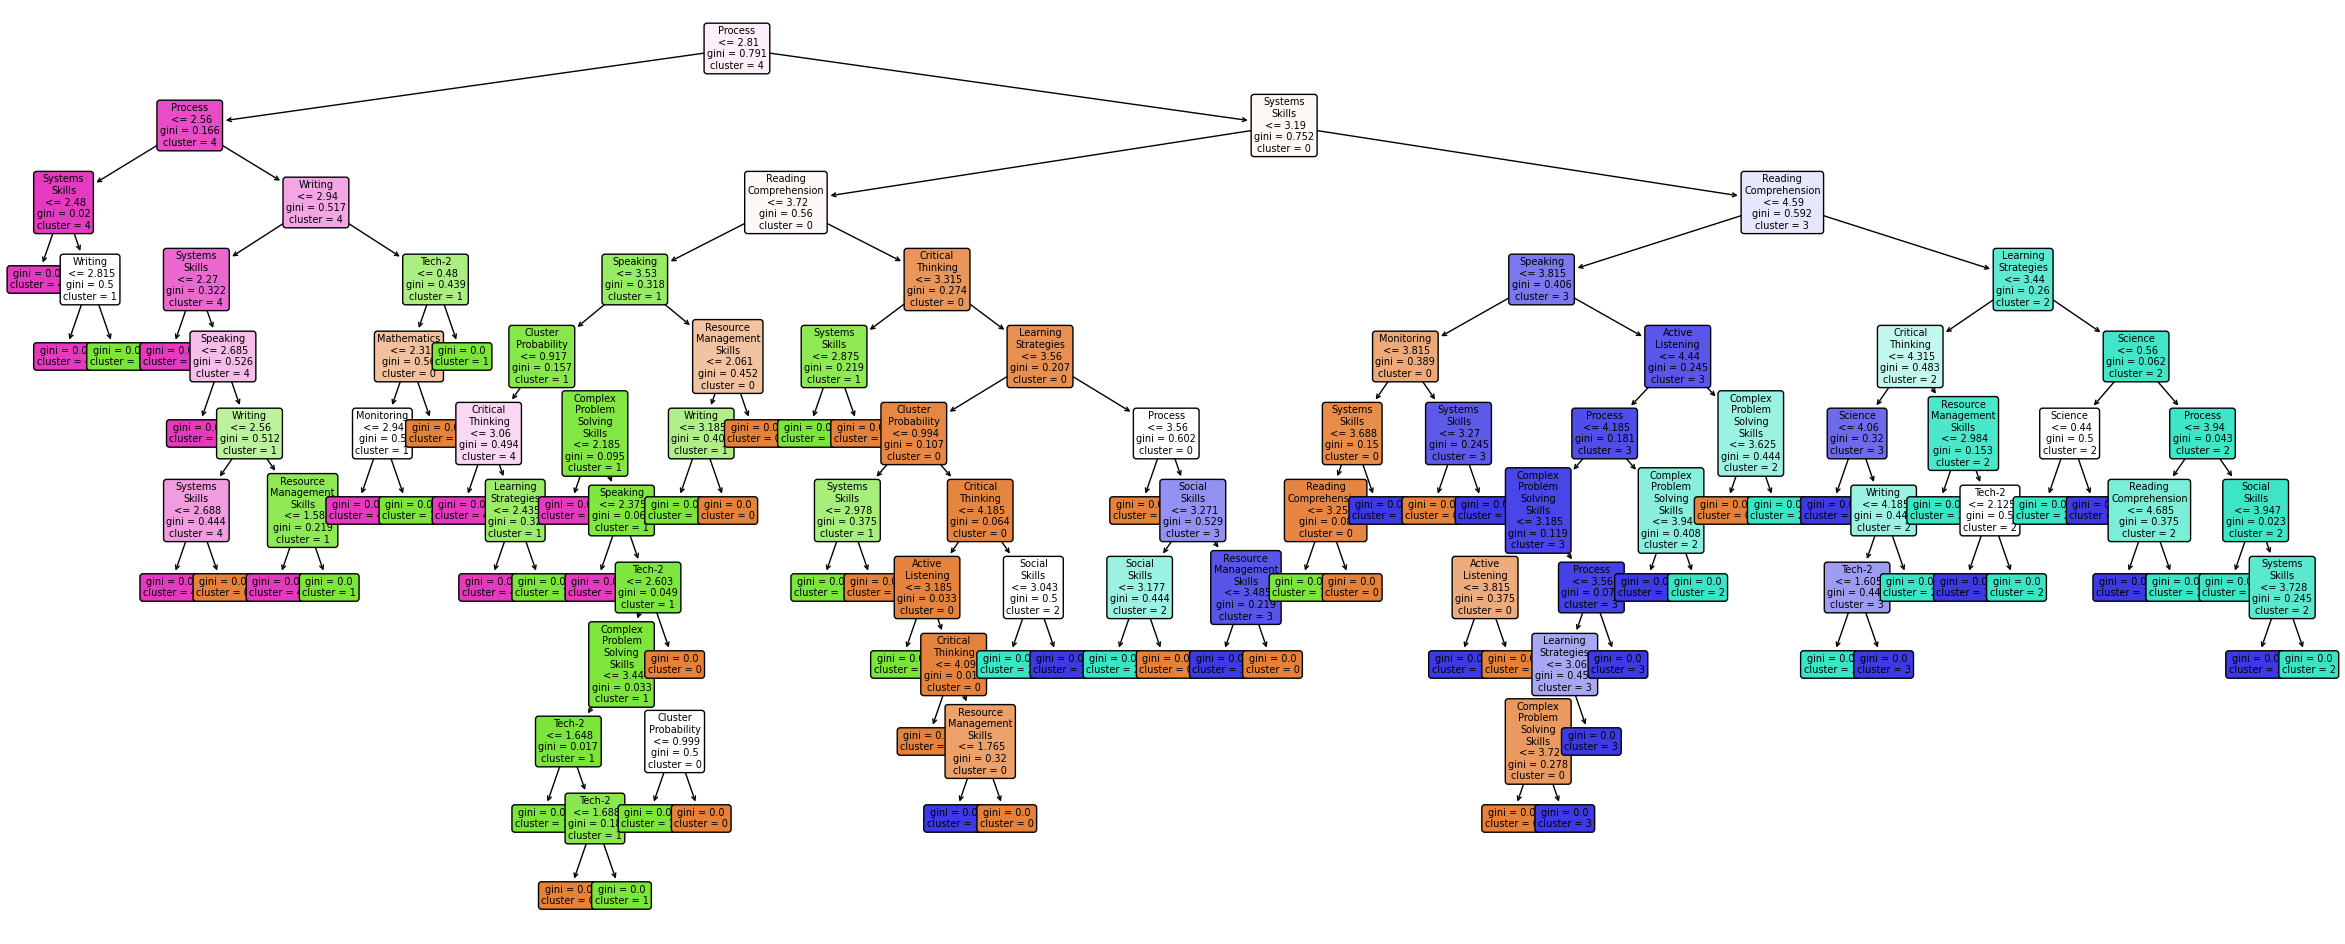

In [35]:
figure = plt.figure(figsize=(30, 12));
axes = figure.add_subplot(111);

plot_tree(
    decision_tree, 
    feature_names=onet_skills.drop(columns='Cluster').columns,
    impurity=True,
    fontsize=7, 
    rounded=True, 
    filled=True, 
    ax=axes
);

format_decision_tree_plot(axes)

if SAVE_FIGURES:
    figure.savefig(join(OUTPUT_PATH, f'latent_profile_analysis_decision_tree_{NUM_CLUSTERS}.png'))
if PRINT_OUTPUT:
    figure.show()
else:
    plt.close(figure)